In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
listings=pd.read_csv('listings.csv')
pd.set_option('display.max_columns',None)
listings.head(5)
listings.rename({'id':'listing_id'}, axis=1,inplace=True)

In [3]:
listings.head()


,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,673276379194656210,https://www.airbnb.com/rooms/673276379194656210,20220910194401,2022-09-10,city scrape,Habitación muy acogedora.,Abrace la simplicidad en este lugar tranquilo ...,El barrio es tranquilo y bien hubicado. Cerc...,https://a0.muscache.com/pictures/miso/Hosting-...,51421682,https://www.airbnb.com/users/show/51421682,Maria Das Merces,2015-12-15,NaN,Sou Bailarina y Terapeuta Integrativa. Trabalh...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/709d3...,https://a0.muscache.com/im/pictures/user/709d3...,NaN,1.0,1.0,"['email', 'phone']",t,t,"L'Hospitalet de Llobregat, Catalunya, Spain",la Bordeta,Sants-Montjuïc,41.363004,2.125326,Private room in condo,Private room,2,NaN,1 shared bath,2.0,2.0,"[""Ethernet connection"", ""Hangers"", ""Hot water ...",$59.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,18,48,78,351,2022-09-10,9,9,9,2022-08-11,2022-09-08,4.89,4.89,5.00,5.00,4.89,4.89,4.78,Exempt,t,1,0,1,0,9.00
1,44192271,https://www.airbnb.com/rooms/44192271,20220910194401,2022-09-10,city scrape,Cozy terrace apartment Apartamento con patio,A private terraced + 2 bedroom ground floor ap...,The neighbourhood is quiet with trees. Though ...,https://a0.muscache.com/pictures/2e579e6b-b717...,200754964,https://www.airbnb.com/users/show/200754964,Nuria,2018-07-08,"Barcelona, Spain",I live in Barcelona. I love travelling and mee...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/0e6be...,https://a0.muscache.com/im/pictures/user/0e6be...,NaN,1.0,1.0,"['email', 'phone']",t,t,"L'Hospitalet de Llobregat, Catalunya, Spain",la Maternitat i Sant Ramon,Les Corts,41.372630,2.113180,Entire condo,Entire home/apt,5,NaN,1 bath,2.0,4.0,"[""Fire extinguisher"", ""Stove"", ""Air conditioni...",$110.00,3,30,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,5,25,55,151,2022-09-10,54,40,4,2020-11-20,2022-08-26,4.83,4.89,4.70,5.00,4.98,4.52,4.65,HUTB-013294,f,1,1,0,0,2.45
2,17039441,https://www.airbnb.com/rooms/17039441,20220910194401,2022-09-10,city scrape,Apart. full equipped. 2 min to Subway lines L1...,Precioso apartamento ideal para parejas. Lumin...,La zona dispone de servicios básicos y una exc...,https://a0.muscache.com/pictures/02af8b09-c8ca...,114340651,https://www.airbnb.com/users/show/114340651,Pepa,2017-02-01,NaN,NaN,within a few hours,100%,97%,t,https://a0.muscache.com/im/pictures/user/8a1dc...,https://a0.muscache.com/im/pictures/user/8a1dc...,NaN,1.0,2.0,"['email', 'phone']",t,t,"L'Hospitalet de Llobregat, Catalunya, Spain",Sants - Badal,Sants-Montjuïc,41.366400,2.116860,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Cooking basics"", ""Security cameras ...",$86.00,3,10,3.

### Applying Some Cleaning

In [4]:
listings.isna().sum().to_frame()

,0
listing_id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [5]:
listings.drop(['calendar_updated','bathrooms'],axis=1,inplace=True)

In [6]:
listings.dtypes

listing_id                                        int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 73, dtype: object

In [7]:
listings['price_cleaned']=listings['price'].str.replace(' ','').str.replace('$','').str.replace(',','')
listings['price_cleaned']=listings['price_cleaned'].astype('float')

In [8]:
listings['host_since']=pd.to_datetime(listings['host_since'].apply(pd.Timestamp))

In [9]:
listings['host_acceptance_rate']=listings['host_acceptance_rate'].str.replace('%','').fillna(0).astype('int')


In [10]:
listings["bathrooms"] = listings["bathrooms_text"].str.split(" ", expand=True)[0]
listings["bathroom_type"] = listings["bathrooms_text"].str.split(" ", expand=True)[1]

In [11]:
listings['price_cleaned'].dtype

dtype('float64')

# Neighbourhoods
----------------------------------------------

In [12]:
listings['neighbourhood_group_cleansed'].value_counts().to_frame()

,neighbourhood_group_cleansed
Eixample,5692
Ciutat Vella,3554
Sants-Montjuïc,2146
Sant Martí,1640
Gràcia,1420
Les Corts,755
Sarrià-Sant Gervasi,725
Horta-Guinardó,439
Sant Andreu,360
Nou Barris,189


In [13]:
listings['neighbourhood_cleansed'].value_counts().to_frame()[:10]

,neighbourhood_cleansed
la Dreta de l'Eixample,2030
el Raval,1216
el Barri Gòtic,1048
la Sagrada Família,961
la Vila de Gràcia,952
"Sant Pere, Santa Caterina i la Ribera",933
l'Antiga Esquerra de l'Eixample,863
Sant Antoni,803
el Poble Sec,775
la Nova Esquerra de l'Eixample,587


Text(0.5, 0, 'Neighbourhoods')

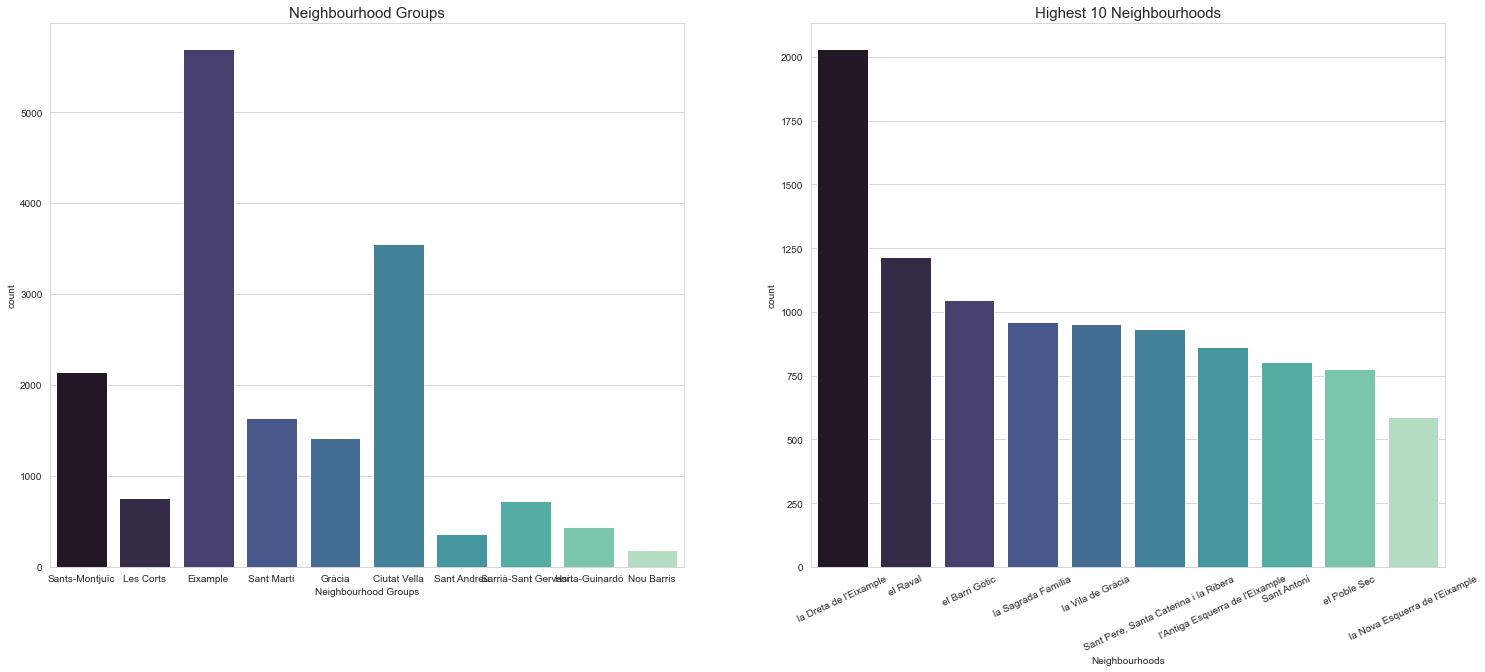

In [14]:
sns.set_style('whitegrid')
fig,axes=plt.subplots(1,2,figsize=(25,10))
sns.countplot(listings['neighbourhood_group_cleansed'],palette='mako',ax=axes[0])
plt.xticks(rotation=25)
#----------------------------------------------------------------------------------------------------------------------------------------------
sns.countplot(listings['neighbourhood_cleansed'],palette='mako',order = listings['neighbourhood_cleansed'].value_counts()[:10].index,ax=axes[1])
plt.xticks(rotation=25)
axes[0].set_title('Neighbourhood Groups',fontsize=15)
axes[1].set_title('Highest 10 Neighbourhoods',fontsize=15)
axes[0].set_xlabel('Neighbourhood Groups')
axes[1].set_xlabel('Neighbourhoods')

## Get Next 30 Days Revenue 

In [15]:
listings['monthly_revenue']=listings['price_cleaned']*(30-listings['availability_30'])

In [16]:
grps_price=listings.groupby(['neighbourhood_group_cleansed']).agg({'price_cleaned':'mean','neighbourhood_group_cleansed':'count','monthly_revenue':'sum'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','neighbourhood_group_cleansed':'No of each Neighbourhood groups','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)
grps_price

,Mean of Price,No of each Neighbourhood groups,Sum of Next Month Revenue
neighbourhood_group_cleansed,,,
Eixample,212.08,5692,23532494.0
Ciutat Vella,137.06,3554,9917383.0
Sants-Montjuïc,155.92,2146,6965274.0
Sant Martí,150.02,1640,4727163.0
Les Corts,229.99,755,3941974.0
Gràcia,134.33,1420,3884194.0
Sarrià-Sant Gervasi,170.25,725,2092513.0
Horta-Guinardó,252.25,439,952055.0
Sant Andreu,110.32,360,537878.0


<AxesSubplot:title={'center':'Neighbourhood Groups and Next Month Revenue'}, xlabel='Sum of Next Month Revenue', ylabel='neighbourhood_group_cleansed'>

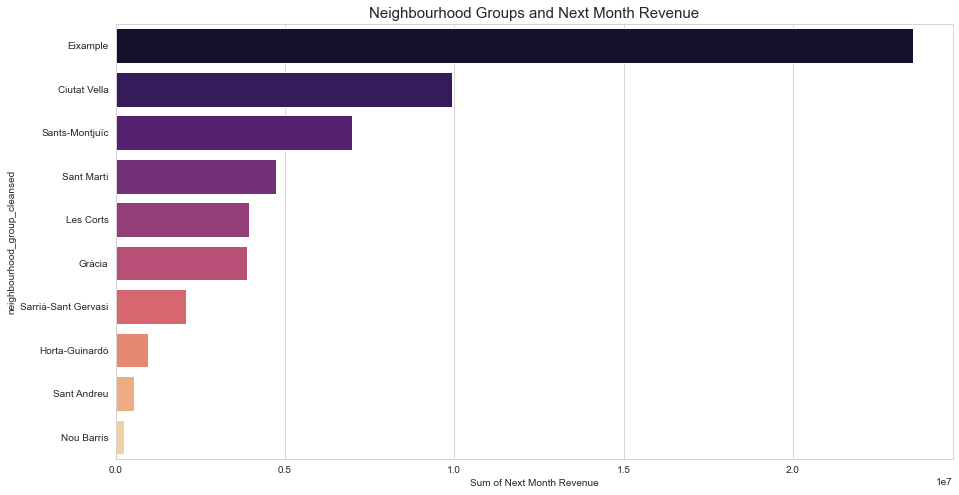

In [17]:
plt.figure(figsize=(15,8))
plt.title('Neighbourhood Groups and Next Month Revenue',fontsize=15)
sns.barplot(data=grps_price,x='Sum of Next Month Revenue',y=grps_price.index,palette='magma')

- # First Insight 
### Sure we Earn more from higher number of Neighbourhood groups with medium mean of Price between (137$ and 212$ per Night) like : [Eixample] and [Ciutat Vella] BUT although Les Corts has higher average of Price per Night (230$) and low Number of Neighbourhoods but it Tends to Earn more than many Neighbourhoods with Lower mean of Price and Higher Number of Neighbourhoods

#### Brief: Monthly Revenue of Available Listings is Higher for Large number of Neighbourhoods with average Price per night BUT in Some cases Lists with Higher than Average price tends to earn more although with lower number of Neighbourhoods (The Difference between Next Month Revenue not like no. of Neighbourhood groups)

#### Recommendation : If we encouarge hosts in Les Corts to offer more lists we may make more profits although its higher than average Price per Night

In [18]:
neigh_price=listings.groupby(['neighbourhood_cleansed']).agg({'price_cleaned':'mean','neighbourhood_cleansed':'count','monthly_revenue':'sum'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','neighbourhood_cleansed':'No of each Neighbourhood','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)[:15]
neigh_price

,Mean of Price,No of each Neighbourhood,Sum of Next Month Revenue
neighbourhood_cleansed,,,
la Dreta de l'Eixample,251.36,2030,8778460.0
la Nova Esquerra de l'Eixample,294.79,587,4364131.0
la Sagrada Família,180.70,961,3467724.0
el Barri Gòtic,157.08,1048,3295213.0
el Raval,133.06,1216,3281901.0
la Maternitat i Sant Ramon,247.42,524,3079900.0
l'Antiga Esquerra de l'Eixample,174.22,863,2991771.0
la Vila de Gràcia,141.38,952,2748956.0
"Sant Pere, Santa Caterina i la Ribera",135.26,933,2563894.0


<AxesSubplot:title={'center':'Neighbourhoods and Next Month Revenue'}, xlabel='Sum of Next Month Revenue', ylabel='neighbourhood_cleansed'>

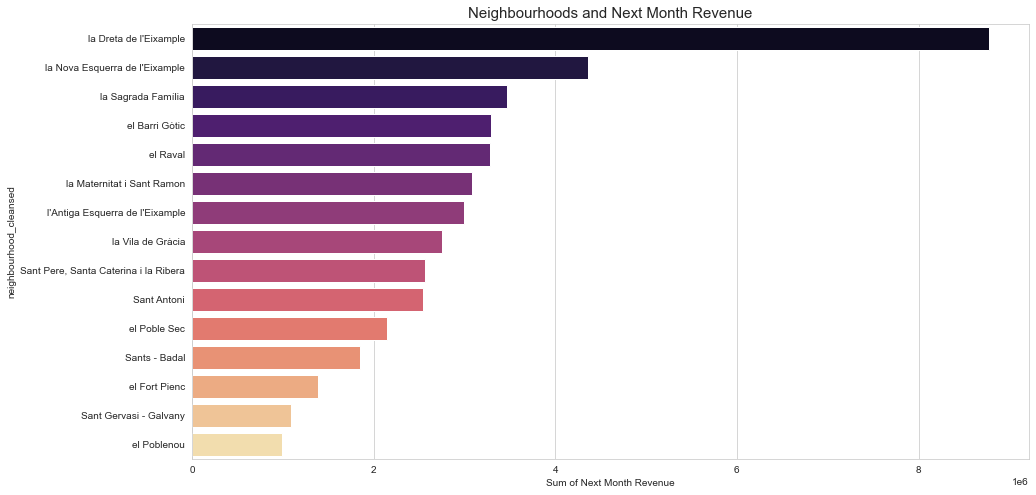

In [19]:
plt.figure(figsize=(15,8))
plt.title('Neighbourhoods and Next Month Revenue',fontsize=15)
sns.barplot(data=neigh_price,x='Sum of Next Month Revenue',y=neigh_price.index,palette='magma')

- # Insights About Neighbourhoods Available in next 30 Days
#### we Have Many Neighbourhood listings that Available less than 10 Days in next 30 Days so we need to increase No of Lists in these Neighbourhoods

In [20]:
listings.groupby('neighbourhood_cleansed')['availability_30'].mean().to_frame().sort_values(by='availability_30',ascending=False)[:30]

,availability_30
neighbourhood_cleansed,
Ciutat Meridiana,29.000000
Can Peguera,22.000000
la Font d'en Fargues,14.900000
la Vall d'Hebron,12.818182
la Trinitat Vella,12.533333
la Trinitat Nova,12.444444
Pedralbes,11.980392
Torre Baró,11.600000
la Teixonera,10.740741


In [214]:
listings.groupby('neighbourhood_group_cleansed')['availability_30'].mean().to_frame().sort_values(by='availability_30',ascending=False).round(2)

,availability_30
neighbourhood_group_cleansed,
Les Corts,8.21
Sant Andreu,8.09
Sant Martí,7.51
Sarrià-Sant Gervasi,7.42
Horta-Guinardó,7.36
Sants-Montjuïc,7.28
Eixample,7.28
Gràcia,6.66
Nou Barris,6.35


# Property and Rooms Type
----------------

In [22]:
listings['property_type'].value_counts().to_frame()[:10]

,property_type
Entire rental unit,8369
Private room in rental unit,4788
Entire serviced apartment,498
Entire condo,436
Room in hotel,376
Entire loft,327
Private room in condo,288
Room in boutique hotel,252
Private room in hostel,215
Private room in home,210


In [23]:
listings['room_type'].value_counts().to_frame()

,room_type
Entire home/apt,10046
Private room,6526
Shared room,176
Hotel room,172


Text(0.5, 0, 'Property Type')

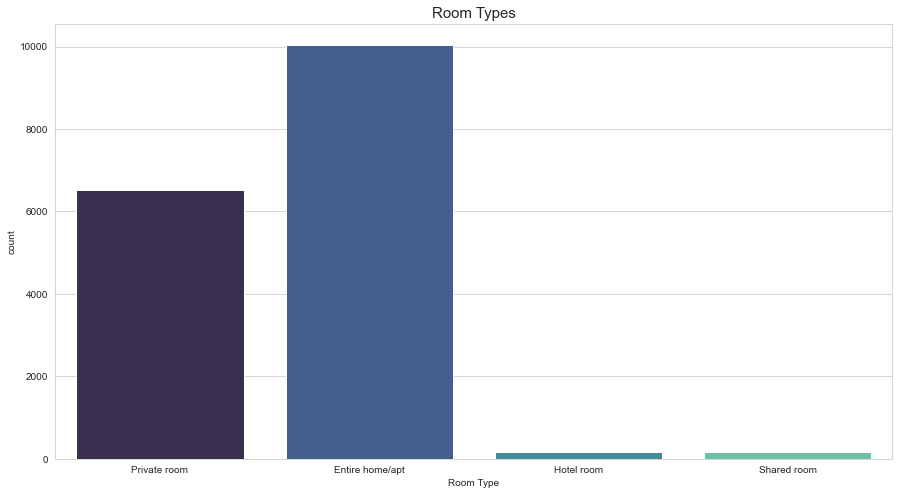

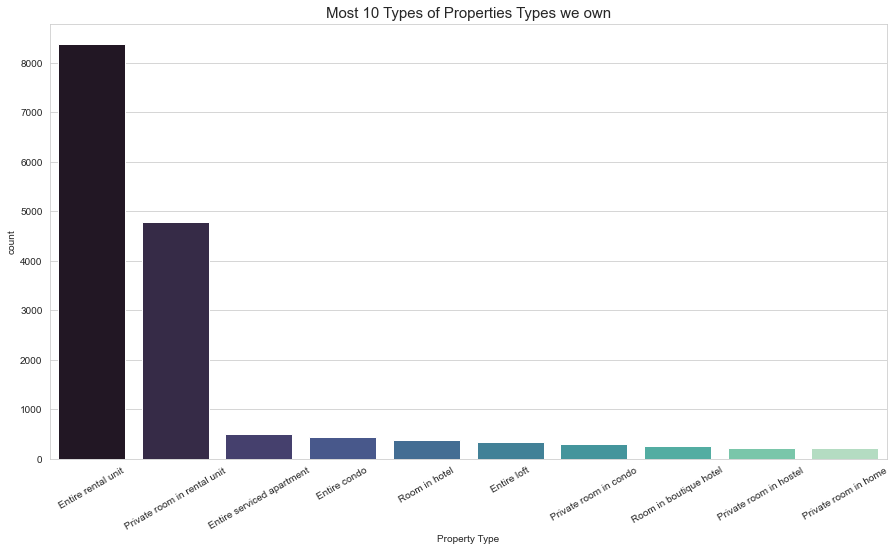

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(listings['room_type'],palette='mako')
plt.title('Room Types',fontsize=15)
plt.xlabel('Room Type')
plt.figure(figsize=(15,8))
sns.countplot(listings['property_type'],order = listings['property_type'].value_counts()[:10].index,palette='mako')
plt.xticks(rotation=30)
plt.title('Most 10 Types of Properties Types we own',fontsize=15)
plt.xlabel('Property Type')


In [25]:
rooms_reve=listings.groupby(['room_type']).agg({'price_cleaned':'mean','room_type':'count','monthly_revenue':'sum'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','room_type':'No of each Room Type','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)
rooms_reve

,Mean of Price,No of each Room Type,Sum of Next Month Revenue
room_type,,,
Entire home/apt,189.42,10046,38562953.0
Private room,148.45,6526,17400430.0
Hotel room,250.27,172,621601.0
Shared room,62.56,176,206310.0


<AxesSubplot:title={'center':'Room Type and Next Month Revenue'}, xlabel='room_type', ylabel='Sum of Next Month Revenue'>

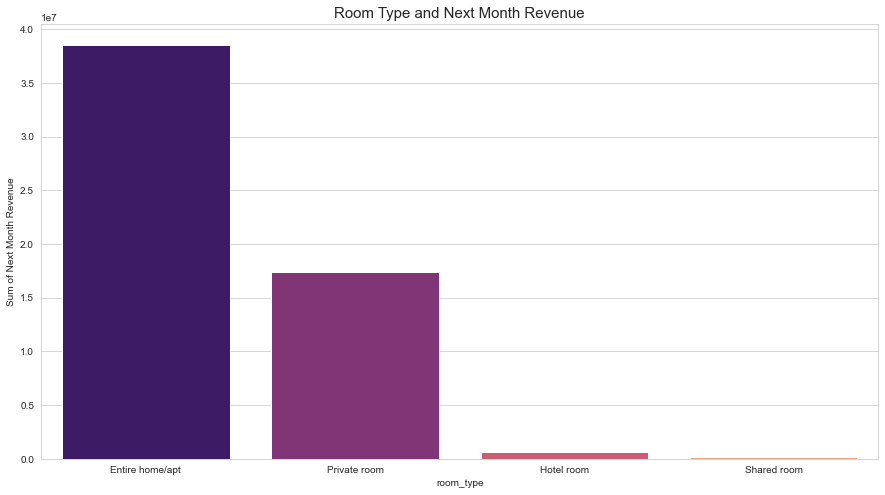

In [26]:
plt.figure(figsize=(15,8))
plt.title('Room Type and Next Month Revenue',fontsize=15)
sns.barplot(data=rooms_reve,x=rooms_reve.index,y='Sum of Next Month Revenue',palette='magma')

<AxesSubplot:title={'center':'Room Type and Mean of Price'}, xlabel='room_type', ylabel='Mean of Price'>

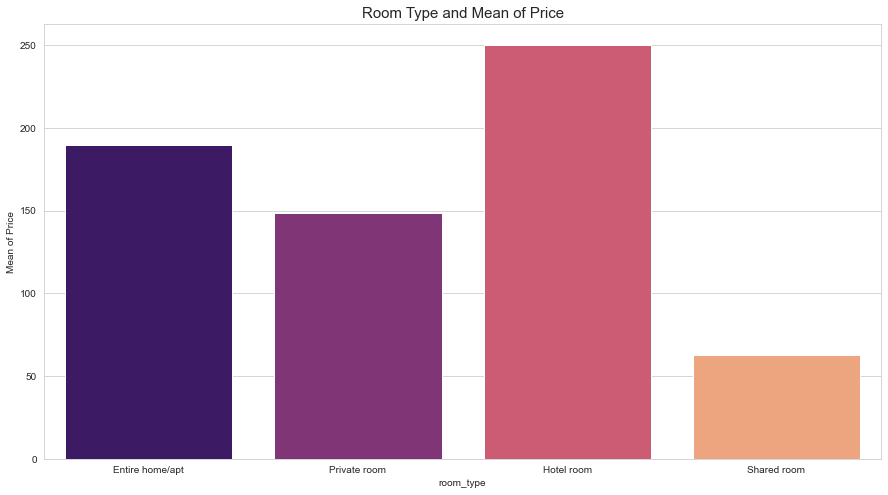

In [27]:
plt.figure(figsize=(15,8))
plt.title('Room Type and Mean of Price',fontsize=15)
sns.barplot(data=rooms_reve,x=rooms_reve.index,y='Mean of Price',palette='magma')

- # Insight 2
- ### Entire Home/Apt is our Best Solution because of its Average price per night and high avaliabilty of this kind of Rooms we have
- ### Insight : Hotel Rooms Tends to earn High Monthly Revenue because of its High mean of Price per night although we have only 173 Hotel room but it can get around 620K next month Unlike Shared room has 176 room but can get only around 20K next month
##### Recommendation : Need a Marketing campain to encourage Hosts to offer a Hotel Rooms because of its Large Income

In [28]:
property_reve=listings.groupby(['property_type']).agg({'price_cleaned':'mean','property_type':'count','monthly_revenue':'sum'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','property_type':'No of each Property Type','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)[:15]
property_reve

,Mean of Price,No of each Property Type,Sum of Next Month Revenue
property_type,,,
Entire rental unit,184.93,8369,31947874.0
Private room in rental unit,79.55,4788,9094244.0
Room in hotel,759.78,376,3159689.0
Entire serviced apartment,282.99,498,2883606.0
Private room in hostel,460.23,215,2603703.0
Entire condo,159.76,436,1429261.0
Room in boutique hotel,294.91,252,1140809.0
Entire loft,127.54,327,882028.0
Private room in condo,71.28,288,501409.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Entire rental unit'),
  Text(1, 0, 'Private room in rental unit'),
  Text(2, 0, 'Room in hotel'),
  Text(3, 0, 'Entire serviced apartment'),
  Text(4, 0, 'Private room in hostel'),
  Text(5, 0, 'Entire condo'),
  Text(6, 0, 'Room in boutique hotel'),
  Text(7, 0, 'Entire loft'),
  Text(8, 0, 'Private room in condo'),
  Text(9, 0, 'Boat'),
  Text(10, 0, 'Entire home'),
  Text(11, 0, 'Private room in guest suite'),
  Text(12, 0, 'Private room in home'),
  Text(13, 0, 'Private room in bed and breakfast'),
  Text(14, 0, 'Entire villa')])

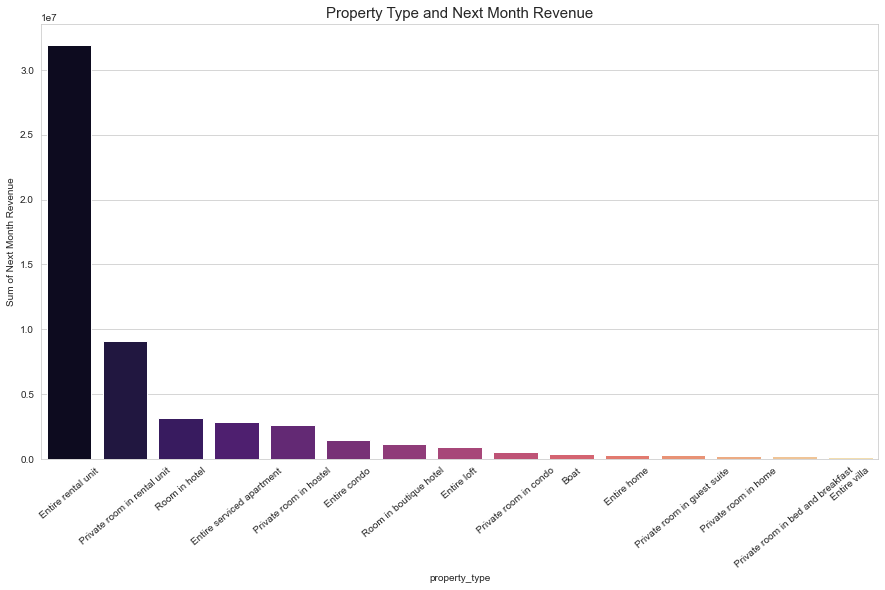

In [29]:
plt.figure(figsize=(15,8))
plt.title('Property Type and Next Month Revenue',fontsize=15)
sns.barplot(data=property_reve,x=property_reve.index,y='Sum of Next Month Revenue',palette='magma')
plt.xticks(rotation=40)

# Bedrooms and No of Beds
-------------------

In [30]:
listings['bedrooms'].value_counts().to_frame()

,bedrooms
1.0,9054
2.0,3958
3.0,2362
4.0,707
5.0,152
6.0,65
7.0,19
8.0,13
9.0,8
10.0,4


In [31]:
listings['beds'].value_counts().to_frame()

,beds
1.0,6994
2.0,3398
3.0,2553
4.0,1757
5.0,895
6.0,532
7.0,205
8.0,108
10.0,53
9.0,43


Text(0.5, 1.0, 'No. of Beds')

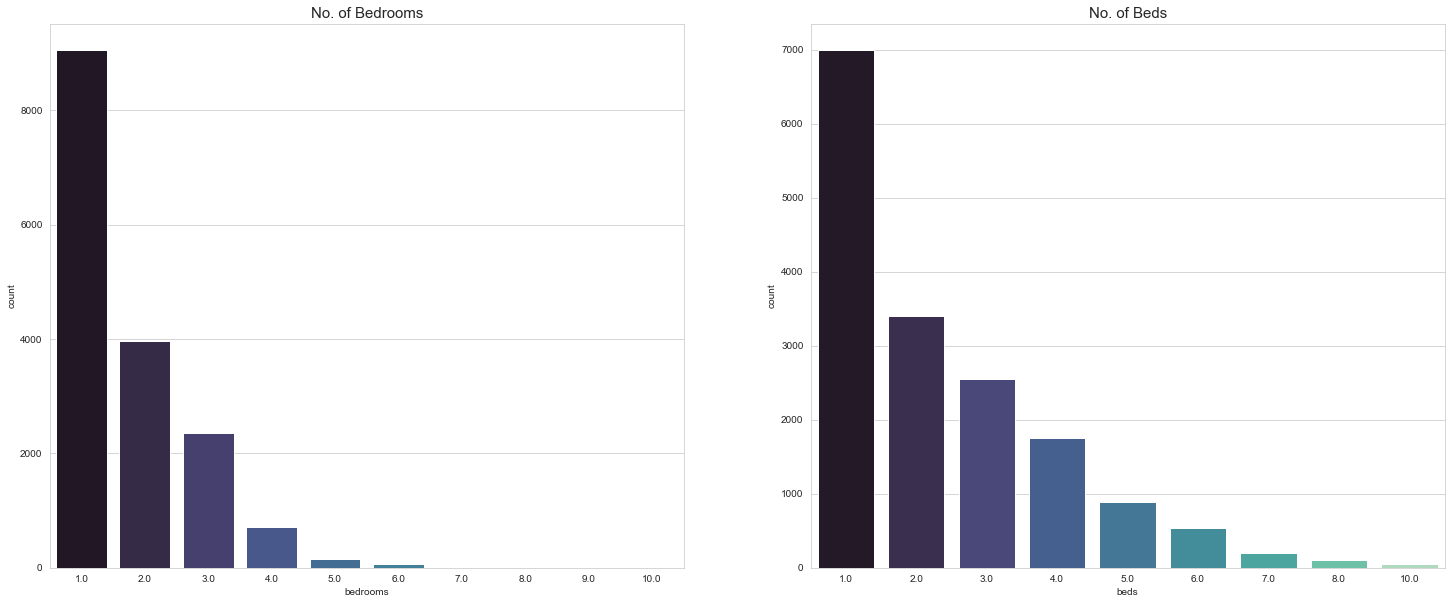

In [32]:
sns.set_style('whitegrid')
fig,axes=plt.subplots(1,2,figsize=(25,10))
sns.countplot(listings['bedrooms'],palette='mako',order = listings['bedrooms'].value_counts()[0:10].index,ax=axes[0])
sns.countplot(listings['beds'],palette='mako',order = listings['beds'].value_counts()[:10].index,ax=axes[1])
axes[0].set_title('No. of Bedrooms',fontsize=15)
axes[1].set_title('No. of Beds',fontsize=15)


<AxesSubplot:title={'center':'Correlation between No of Beds and No of Bedrooms'}, xlabel='bedrooms', ylabel='beds'>

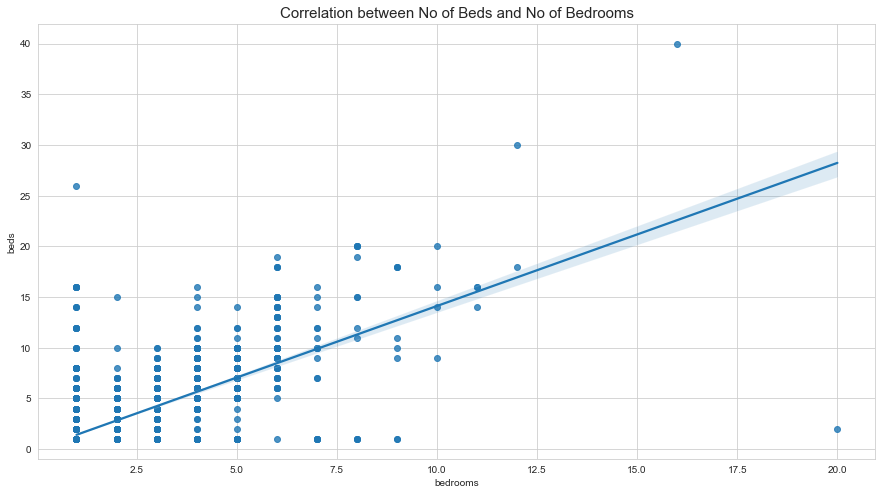

In [33]:
plt.figure(figsize=(15,8))
plt.title('Correlation between No of Beds and No of Bedrooms',size=15)
sns.regplot(data=listings,x=listings['bedrooms'],y=listings['beds'])


In [34]:
bed_rooms=listings.groupby(['bedrooms']).agg({'price_cleaned':'mean','bedrooms':'count','monthly_revenue':'sum'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','bedrooms':'No of Bedrooms','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)
bed_rooms

,Mean of Price,No of Bedrooms,Sum of Next Month Revenue
bedrooms,,,
1.0,136.76,9054,22315431.0
2.0,169.28,3958,14128727.0
3.0,214.90,2362,10143555.0
4.0,284.00,707,3945128.0
5.0,371.00,152,1068602.0
6.0,574.29,65,517040.0
9.0,808.38,8,90958.0
7.0,340.37,19,84192.0
8.0,740.08,13,37656.0


<AxesSubplot:title={'center':'Relationship between No of Bedrooms and Price Mean'}, xlabel='Mean of Price', ylabel='bedrooms'>

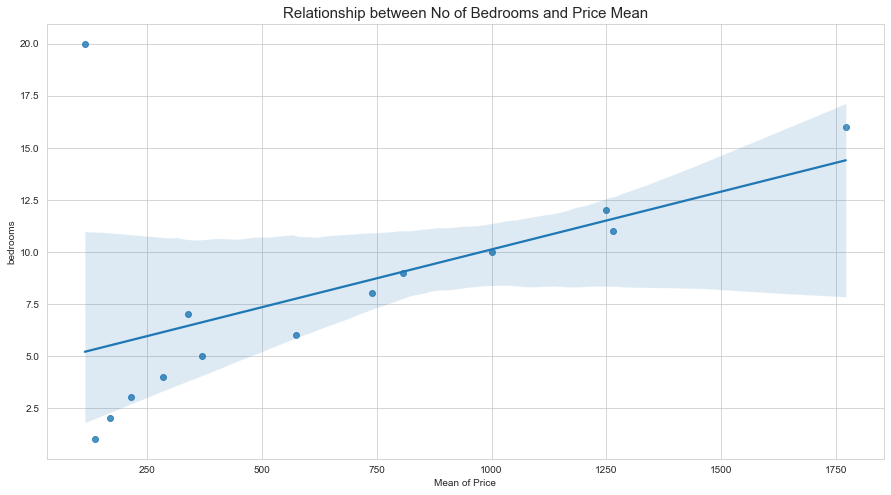

In [35]:
plt.figure(figsize=(15,8))
plt.title('Relationship between No of Bedrooms and Price Mean',size=15)
sns.regplot(x=bed_rooms['Mean of Price'],y=bed_rooms.index)

- # Third Insight
- #### We Have very low Number of Properties having more than 4 Bedrooms compared to properties having from 1 to 4 Rooms and there is Postive Correlation between no. of Bedrooms and mean of price per night 
- #### BUT To be more Realistic we don't need high number of Properties with higher than 4 bedrooms but we can get benefit from this Insight that We should give attention to Properties with more than 1 Room Specifically (3 and 4 Bedrooms) as they have High mean Price per night


In [36]:
beds_revenue=listings.groupby(['beds']).agg({'price_cleaned':'mean','beds':'count','monthly_revenue':'sum'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','beds':'Count of Beds','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)
beds_revenue[:10]

,Mean of Price,Count of Beds,Sum of Next Month Revenue
beds,,,
1.0,137.59,6994,17070096.0
2.0,149.77,3398,10832966.0
3.0,175.76,2553,8941510.0
4.0,206.44,1757,7593115.0
5.0,245.85,895,4522958.0
6.0,313.35,532,3516703.0
7.0,330.70,205,1302936.0
8.0,480.25,108,1008114.0
9.0,478.12,43,345817.0


<AxesSubplot:title={'center':'Relationship between No of Beds and Price Mean'}, xlabel='Mean of Price', ylabel='beds'>

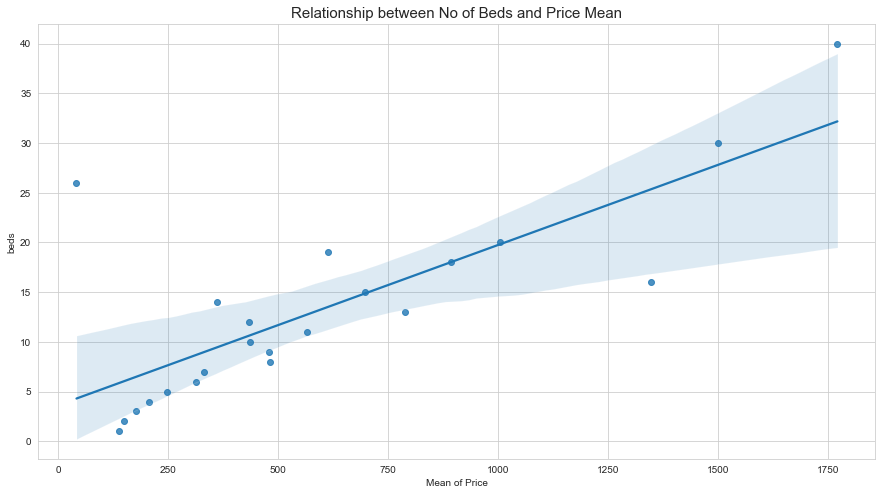

In [37]:
plt.figure(figsize=(15,8))
plt.title('Relationship between No of Beds and Price Mean',size=15)
sns.regplot(x=beds_revenue['Mean of Price'],y=beds_revenue.index)

- ## Insight 

In [38]:
listings.groupby('accommodates')['beds'].mean().to_frame().sort_values(by='accommodates')[1:].round(2)

,beds
accommodates,
1,1.23
2,1.20
3,2.10
4,2.57
5,3.58
6,4.17
7,5.07
8,5.59
9,6.71


In [39]:
listings.groupby('accommodates')['bedrooms'].mean().to_frame().sort_values(by='accommodates')[1:].round(2)

,bedrooms
accommodates,
1,1.15
2,1.05
3,1.47
4,1.79
5,2.51
6,2.65
7,3.26
8,3.38
9,4.11


# Bathrooms 
-------------

In [40]:
listings['bathrooms_text'].value_counts().to_frame()

,bathrooms_text
1 bath,6913
2 baths,2899
1 shared bath,2843
1 private bath,1382
1.5 baths,798
1.5 shared baths,663
2 shared baths,501
3 baths,247
2.5 baths,128
4 baths,92


Text(0.5, 0, 'No of Bathrooms')

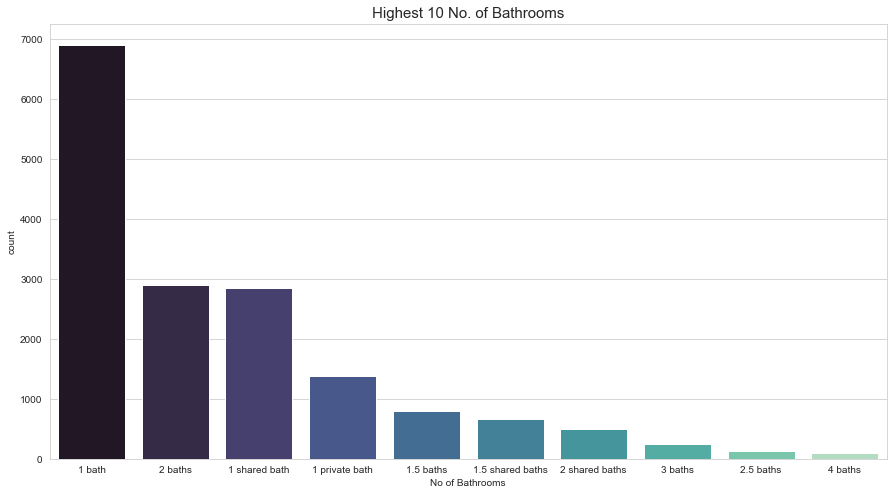

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(listings['bathrooms_text'],palette='mako',order = listings['bathrooms_text'].value_counts()[:10].index)
plt.title('Highest 10 No. of Bathrooms',fontsize=15)
plt.xlabel('No of Bathrooms')

In [42]:
baths_revenue=listings.groupby(['bathrooms_text']).agg({'price_cleaned':'mean','bathrooms_text':'count','monthly_revenue':'sum'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','bathrooms_text':'Count of Bathrooms','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)
baths_revenue

,Mean of Price,Count of Bathrooms,Sum of Next Month Revenue
bathrooms_text,,,
1 bath,149.56,6913,21543638.0
2 baths,221.06,2899,12780045.0
1 private bath,293.58,1382,5535261.0
1 shared bath,90.59,2843,4139280.0
1.5 baths,156.65,798,2890395.0
0 baths,3716.08,25,2733813.0
1.5 shared baths,119.46,663,2041066.0
3 baths,334.43,247,1531310.0
4 baths,531.11,92,788228.0


#### We Have some Inconsistent Data in Bathrooms text column like 0 Baths with Highest mean of Price (3716.08) while 12 shared with 55$ per night

# Accommodates
---------------------

In [43]:
listings['accommodates'].value_counts().to_frame()

,accommodates
2,5489
4,3502
1,2347
6,1725
3,1324
5,1304
8,516
7,300
10,166
9,97


Text(0.5, 0, 'Number of Accommodates')

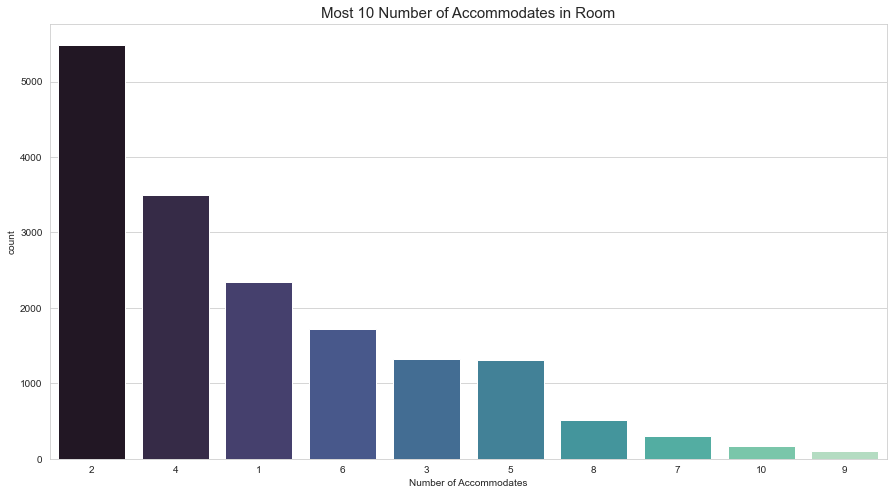

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(listings['accommodates'],order = listings['accommodates'].value_counts()[:10].index,palette='mako')
plt.title('Most 10 Number of Accommodates in Room',fontsize=15)
plt.xlabel('Number of Accommodates')


In [45]:
accommodates_reve=listings.groupby(['accommodates']).agg({'price_cleaned':'mean','accommodates':'count','monthly_revenue':'sum'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','accommodates':'Count of accommodates','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)
accommodates_reve

,Mean of Price,Count of accommodates,Sum of Next Month Revenue
accommodates,,,
2,151.39,5489,15649442.0
4,168.30,3502,12682823.0
6,238.87,1725,8530065.0
5,194.19,1304,5140674.0
3,130.57,1324,3568995.0
8,320.43,516,3201318.0
1,93.36,2347,3128090.0
7,257.88,300,1530533.0
10,427.33,166,1377032.0


<AxesSubplot:title={'center':'Relationship between No of Accommodates and Price Mean'}, xlabel='Mean of Price', ylabel='accommodates'>

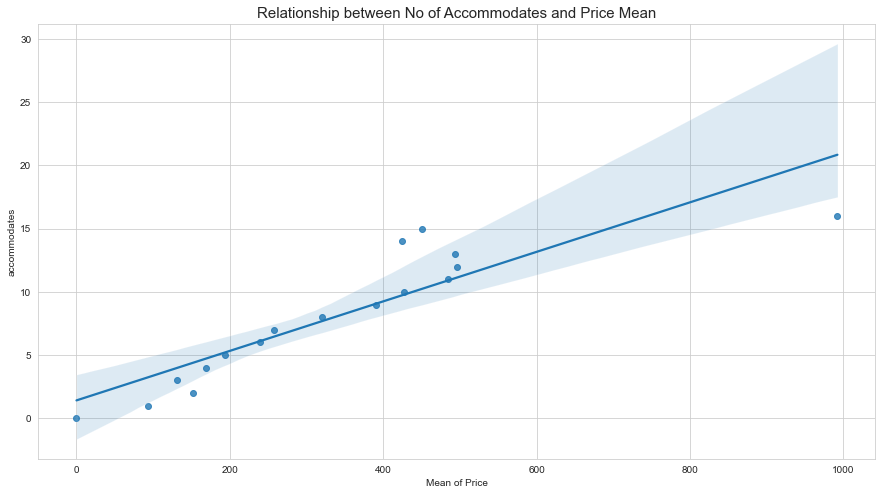

In [46]:
plt.figure(figsize=(15,8))
plt.title('Relationship between No of Accommodates and Price Mean',size=15)
sns.regplot(x=accommodates_reve['Mean of Price'],y=accommodates_reve.index)

- # Fourth Insight
### Although there is a Postive corelation between No of Accommodates and Mean of Price of list per night but we have a small number of Lists that accommodates only One Person and I think we should increase number of Rooms that accommodates one person compared to rooms that accommodates 2 or 4 Persons


#       Explore Solo Travel Trends & Stats by Demographics, Destination, Industry & Why Solo Travel Continues to Rise!
 

How many people travel alone? Solo travellers travel frequently, around 3 or more times a year and make up 11% of the overall travel market. Solo travel has been trending upwards since 2016, showing percentage growth around 131% in google searches ‘solo travel’. And its women who are leading the way to travel solo, with 84% of overall market bookings.

 

Its not just millennials heading off on a gap year prior to starting college or university, according to Booking.com its Baby Boomer solo travel which is now leading the trend, having seen 40% of 55 to 64 year old’s having travelled alone last year.

 

As you’ll see from the data below, unaccompanied travel behaviour has started to shape the industry with some travel agents recognising the shift and dropping single supplement fees. Independent travellers statistics show that travelling solo is more socially excepted, and on Instagram the hashtag #solotravel is associated with 5.2 million posts.

![Alt text](Solo.png)

# Amenities
-------------

## Check Rooms with Price higher than Average and their Amenities

![Alt text](Ametuuu.png)

In [47]:
labels=['Low Price','Medium Price','High Price']
listings['Price Segments']=pd.qcut(listings['price_cleaned'],3,labels=labels)

In [48]:
listings['No of amenities'] = listings['amenities'].str.strip(' ,[]').str.count(',') + 1

- # Insight About No of Amenities
### If we divided our Rooms prices to 3 Segments (High & Medium & Low) and calculate Number of Amenities in each Segment then we will find that there is no High Difference between No of Amenities in High and Medium Segements While there is High Difference between Low Segment and other segments

In [49]:
listings.groupby('Price Segments').agg({'price_cleaned':'mean','No of amenities':'mean'}).sort_values(by='No of amenities',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price'}).round(decimals=0)

,Mean of Price,No of amenities
Price Segments,,
High Price,376.0,28.0
Medium Price,106.0,26.0
Low Price,40.0,20.0


<AxesSubplot:xlabel='No of amenities', ylabel='Density'>

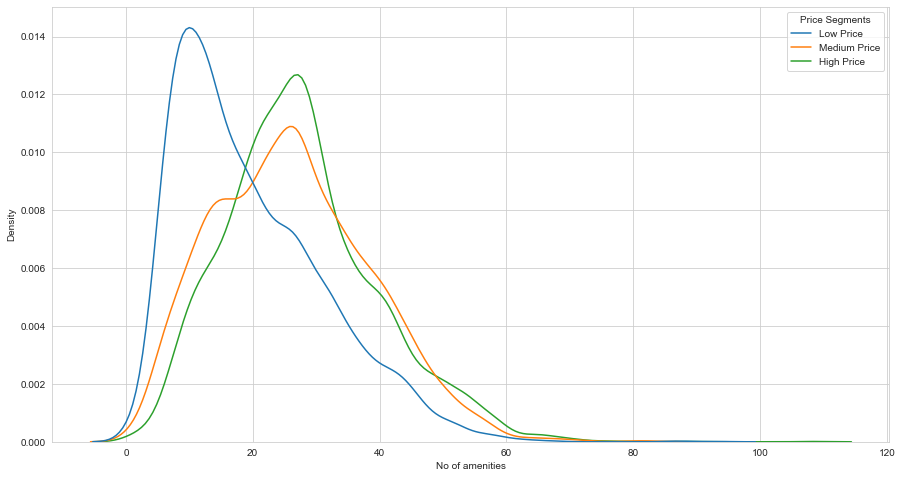

In [50]:
plt.figure(figsize=(15,8))
sns.kdeplot(listings['No of amenities'],hue=listings['Price Segments'])

In [51]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS

stemmer=PorterStemmer()
stop=set(stopwords.words('english'))


def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)

listings['amenities_text']=listings['amenities'].apply(column_clean)    

In [52]:
amenities=listings['amenities'].values.tolist()
# Corpus for WordCloud
amenities_corpus=' '.join(amenities)
from nltk import FreqDist 
freq=FreqDist(amenities_corpus.split())
freq=freq.most_common(25)
freq

[('allowed",', 18685),
 ('and', 17470),
 ('"Wifi",', 15643),
 ('term', 15556),
 ('stays', 15556),
 ('"Long', 14979),
 ('"Hot', 14661),
 ('"Essentials",', 14412),
 ('"Hair', 13195),
 ('dryer",', 13149),
 ('"Iron",', 12399),
 ('"Heating",', 11505),
 ('water",', 11285),
 ('silverware",', 11047),
 ('"Dishes', 11045),
 ('conditioning",', 10874),
 ('"Refrigerator",', 10621),
 ('"Kitchen",', 10152),
 ('"Hangers",', 10090),
 ('"Coffee', 9846),
 ('"TV",', 9833),
 ('"Bed', 9762),
 ('linens",', 9728),
 ('basics",', 9608),
 ('"Microwave",', 9554)]

- ## Insight About Amenities
- Wifi is The Most Common Amenity with 15643 Time mentioned
- Hot Water is the Second with 14661
- Hair Dryer is the Third Amenity exists with around 13200 Time 
- Silverware is also common Amenity which mentioned aroud 11050 Time
- Conditioning & Refrigerator & Coffee & TV & Microwave 

- ### But what is The Most Commont Amenities in each Segment?

In [53]:
high_segment=listings[listings['Price Segments']=='High Price']
medium_segment=listings[listings['Price Segments']=='Medium Price']
low_segment=listings[listings['Price Segments']=='Low Price']

In [54]:
high_amenities=high_segment['amenities'].values.tolist()
medium_amenities=medium_segment['amenities'].values.tolist()
low_amenities=medium_segment['amenities'].values.tolist()

In [55]:
high_corpus=' '.join(high_amenities)
medium_corpus=' '.join(medium_amenities)
low_corpus=' '.join(low_amenities)

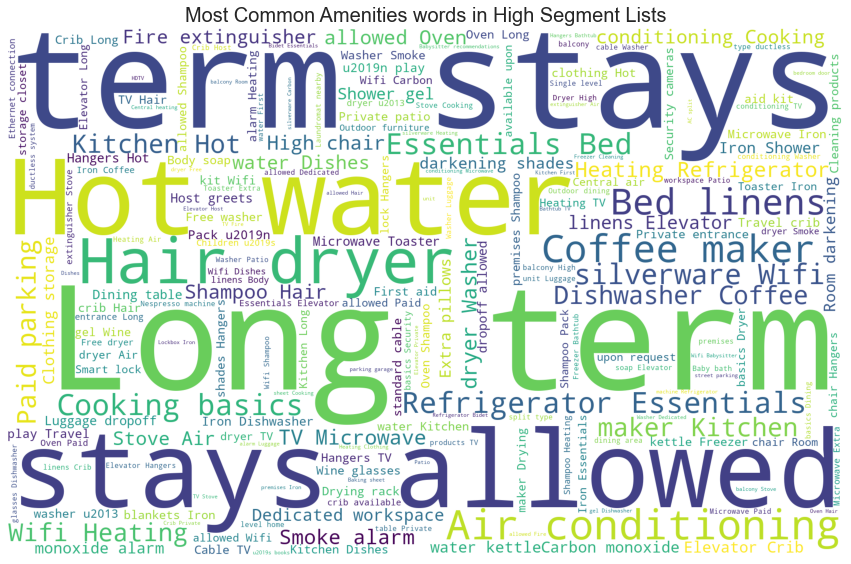

In [56]:
plt.figure(figsize=(15,10))
wordcloudhigh=WordCloud(width = 1900 , height = 1200 , background_color='white').generate(high_corpus)
plt.axis('off')
plt.title('Most Common Amenities words in High Segment Lists',size=20)
plt.imshow(wordcloudhigh)

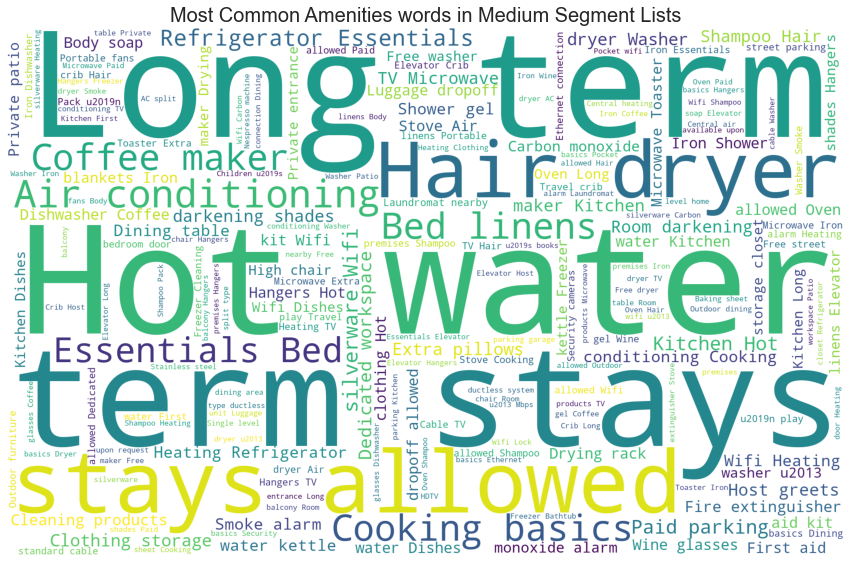

In [230]:
plt.figure(figsize=(15,10))
wordcloudmedium=WordCloud(width = 1900 , height = 1200 , background_color='white').generate(medium_corpus)
plt.axis('off')
plt.title('Most Common Amenities words in Medium Segment Lists',size=20)
plt.imshow(wordcloudmedium)

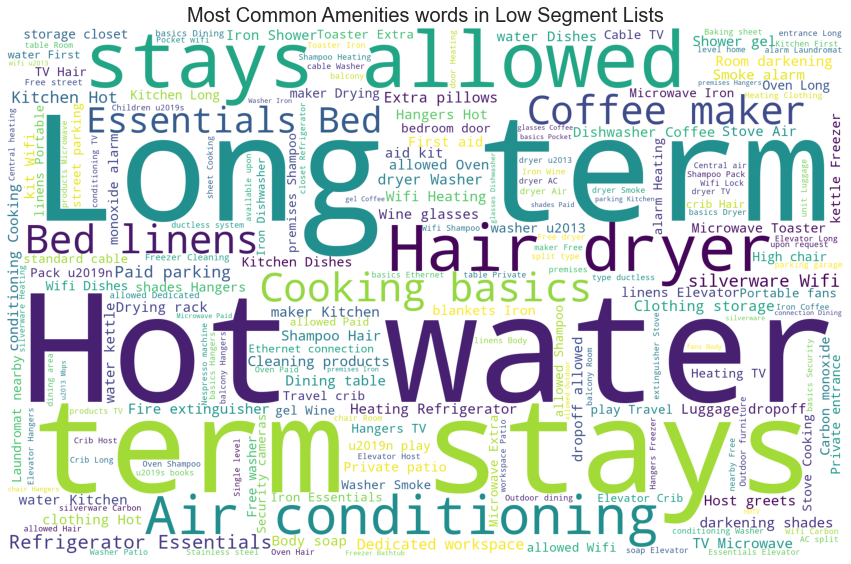

In [58]:
plt.figure(figsize=(15,10))
wordcloudlow=WordCloud(width = 1900 , height = 1200 , background_color='white').generate(low_corpus)
plt.axis('off')
plt.title('Most Common Amenities words in Low Segment Lists',size=20)
plt.imshow(wordcloudlow)

# Hosts and Reviews
 ----------------

In [224]:
listings.groupby(['host_name']).agg({'host_total_listings_count':'count','review_scores_value':'mean'}).sort_values(by='host_total_listings_count',ascending=False)[:10]

,host_total_listings_count,review_scores_value
host_name,,
Luis,167,4.380365
Eva & Jacques,161,4.135166
Ukio,155,4.284074
Habitat Apartments,139,4.297578
Stay U-Nique,137,4.365954
Jordi,131,4.601121
Acomodis Apartments,127,4.288088
SweetInn,127,4.249052
Maria,123,4.633824


- # Insight About Host Response Time
### As we See Hosts with High Response time (a few days or more) tends to Have a low Review Rate and Low Profit expected 
### Another reason for this low next month revenue expected because of they have a High mean of Price per night

In [59]:
listings.groupby(['host_response_time']).agg({'price_cleaned':'mean','monthly_revenue':'sum','review_scores_rating':'mean'}).sort_values(by='monthly_revenue',ascending=False)\
.rename(columns={'price_cleaned':'Mean of Price','review_scores_rating':'Average of Review Rate','monthly_revenue':'Sum of Next Month Revenue'}).round(decimals=2)

,Mean of Price,Sum of Next Month Revenue,Average of Review Rate
host_response_time,,,
within an hour,170.56,34955981.0,4.55
within a few hours,144.89,8045796.0,4.54
within a day,198.14,2955470.0,4.51
a few days or more,288.02,585255.0,4.36


## But Why they have a High Respone Time Although their Rooms are the most Available in Next 30 Days?

In [60]:
listings.groupby(['host_response_time']).agg({'availability_30':'mean'})

,availability_30
host_response_time,
a few days or more,16.256997
within a day,6.969796
within a few hours,6.570074
within an hour,8.191150


- # Insight : Price of List increases if Host is Super Host

In [61]:
listings.groupby(['host_is_superhost'])['price_cleaned'].mean().sort_values(ascending=False).to_frame()


,price_cleaned
host_is_superhost,
t,185.504280
f,170.404846


- ## Hosts have Many Verifications methods tends to increase their Rooms Price rather than those who have one Verification method

In [62]:
listings.groupby(['host_verifications']).agg({'price_cleaned':'mean'}).sort_values(by='price_cleaned',ascending=False)[:5]

,price_cleaned
host_verifications,
"['phone', 'work_email']",247.708122
"['email', 'phone', 'work_email']",185.114135
"['email', 'phone']",173.591185
['phone'],113.019841
['email'],79.265306


- # Insight About No of Reviews
### Rooms with Higher Prices tends to have more Number of Reviews

In [229]:
listings.groupby('Price Segments')['number_of_reviews'].sum().sort_values(ascending=False).to_frame()

,number_of_reviews
Price Segments,
High Price,286649
Medium Price,270824
Low Price,136740


### Rooms with Low Price have less Rating scores

In [64]:
listings.groupby('Price Segments')['review_scores_rating'].mean().sort_values(ascending=False).to_frame()

,review_scores_rating
Price Segments,
Medium Price,4.555490
High Price,4.536807
Low Price,4.482048


# Has Availability
--------

- ## Entrire Home/apt and Private room have low available days in next 30 Days
### Suggestion: Entire home/apt is the most profit-making type of Rooms so we need to increase No of Available rooms of this Type.


In [231]:
listings.groupby('room_type')['availability_30'].mean().to_frame().sort_values(by='availability_30',ascending=False)[:30].round(2)

,availability_30
room_type,
Shared room,14.00
Hotel room,13.19
Entire home/apt,7.38
Private room,6.26


- ## We Have many Properties types have less than 5 Days available in next 30 Days and they have High mean of Price per Night like (Entire cabin & Private room in guest suite &Private room in vacation home)
### Suggestion: we may Need to increase the number of these types of Property types where more profits can be earn

In [66]:
listings.groupby('property_type').agg({'availability_30':'mean','price_cleaned':'mean'}).sort_values(by='availability_30',ascending=True)[:30]

,availability_30,price_cleaned
property_type,,
Barn,0.000000,146.000000
Shared room in tower,0.000000,98.000000
Shared room in loft,0.000000,68.750000
Entire cabin,0.000000,350.000000
Shared room in guest suite,0.000000,52.500000
Private room in dome,0.500000,27.833333
Entire home/apt,2.000000,130.000000
Private room in floor,2.333333,34.416667
Private room in guest suite,3.442623,1106.475410
